## T-SNE

**first we use T-SNE with all the data except the timestamp and the turbine names:**

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.manifold import TSNE

The dataset: https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/information

In [3]:
df = pd.read_csv('data/la-haute-borne-data-2017-2020.csv', sep=';',header=1)
df_header = pd.read_csv('data/la-haute-borne-data-2017-2020.csv', sep=';',header=None)
#due to a laptop that is not better than a potato we have to sample data so get less data
df1 = df.sample(136)
df2 = df1.values
pd_header = df_header.values
label = pd_header[0]
df2.shape

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(136, 138)

In [4]:
label = np.delete(label, [0,1])
label.shape

(136,)

In [5]:
df_rdy = np.delete(df2, [0,1], axis=1)
df_rdy.shape

(136, 136)

In [6]:
df_rdy[pd.isnull(df_rdy)] = 0

In [7]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df_rdy)
tsne_result.shape
# (136, 2)

(136, 2)

In [8]:
label.shape

(136,)

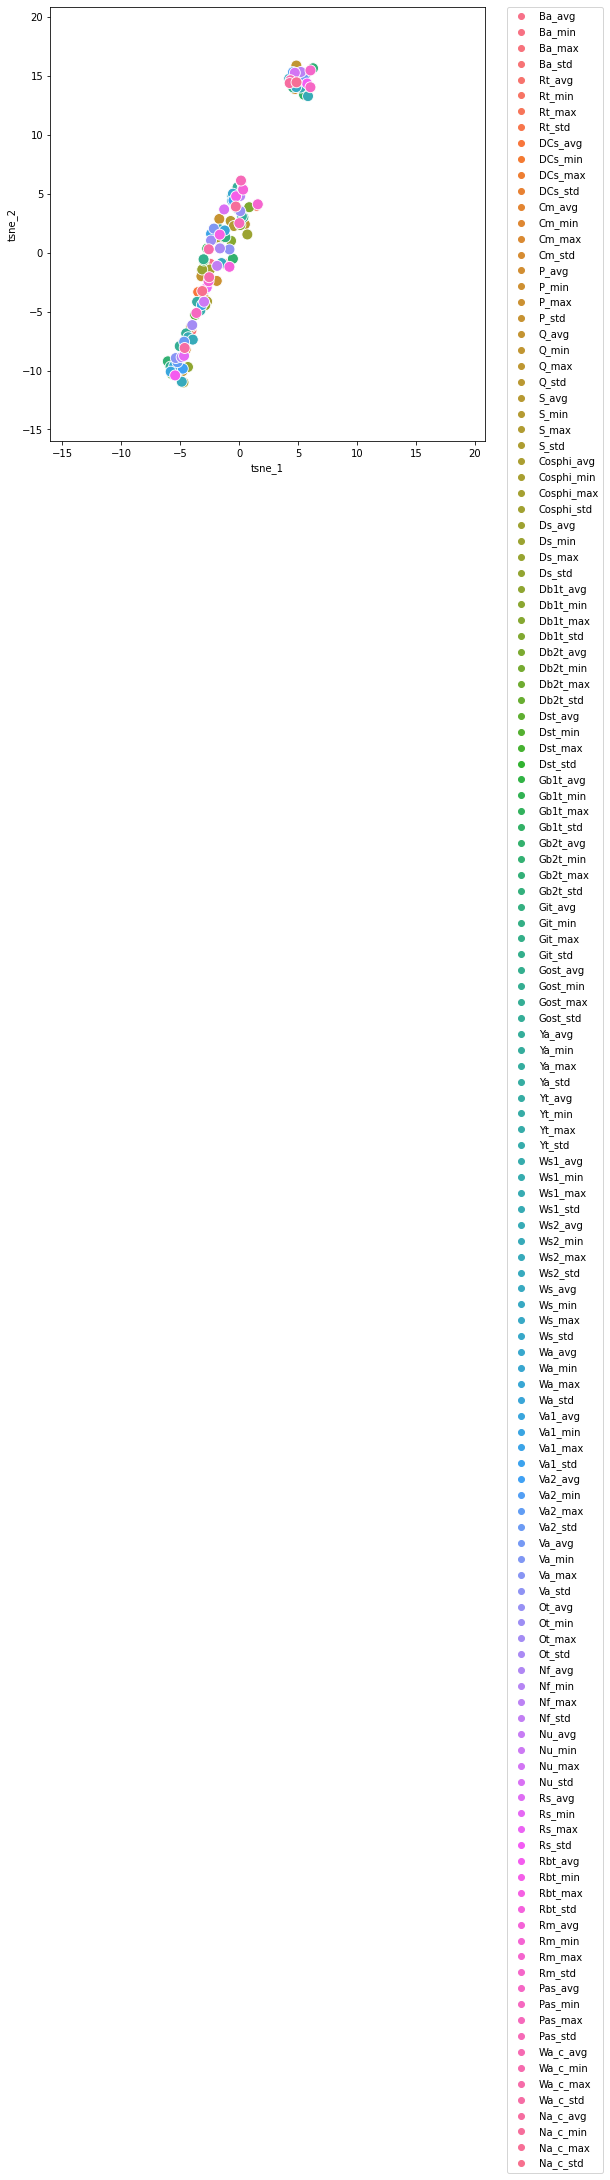

In [9]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': label})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

**we use T-SNE with only the AVG columns data except the timestamp and the turbine names but without labels and a sample of 5000**

In [39]:
df = pd.read_csv('data/la-haute-borne-data-2017-2020-AVG.csv', sep=';',header=1)
df_header = pd.read_csv('data/la-haute-borne-data-2017-2020-AVG.csv', sep=';',header=None)
df1 = df.sample(50000)
df2 = df1.values
pd_header = df_header.values
label = pd_header[0]
df1.head()

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,44.990002,14.0,38.369999,2.3900001,-1.8900000000000001,0.0,1.8900000000000001,1.0,38.110001,33.41,...,39.939999,4.8000001999999995,50.0,698.40002,0.33000001,19.02,-18.889999,Unnamed: 31,358.04999.1,358.04999.2
187263,-0.990000,13.000000,1331.630000,2110.5601,268.32999,3.12,268.38000,1.0,1330.600000,38.910000,...,16.950001,6.580000,50.009998,699.38,12.68,21.100000,1919.85,NaN,NaN,NaN
198926,-0.950000,24.000000,1786.020000,6011.5100,1129.33000,71.89,1131.82000,1.0,1794.290000,35.750000,...,NaN,16.820000,49.960000,693.31,17.13,35.180000,6002.35,NaN,NaN,NaN
166962,44.990002,19.000000,82.470001,10.5000,-2.13000,0.00,2.13000,1.0,85.309998,42.720001,...,20.120001,11.000000,49.990002,697.62,0.81,23.129999,-229.09,NaN,NaN,NaN
16782,-0.990000,24.969999,1276.810100,1879.9900,219.56000,3.17,219.60001,1.0,1275.430100,42.580002,...,-4.950000,17.700001,50.020000,697.37,12.15,28.700001,1640.75,NaN,102.6,102.6
213412,-0.990000,14.000000,1443.630000,2488.2500,358.04000,16.90,358.53000,1.0,1443.080000,43.840000,...,NaN,7.010000,49.990000,704.63,13.76,27.300000,2352.41,NaN,NaN,NaN


In [40]:
label = np.delete(label, [0,1])
label.shape
df_rdy = np.delete(df2, [0,1], axis=1)
df_rdy.shape
df_rdy[pd.isnull(df_rdy)] = 0

In [41]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df_rdy)
tsne_result.shape
# (136, 2)
label0 = np.full(shape=50000,fill_value=3,dtype=np.int)


<ipython-input-41-e29f4d3396ab>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label0 = np.full(shape=50000,fill_value=3,dtype=np.int)


No handles with labels found to put in legend.


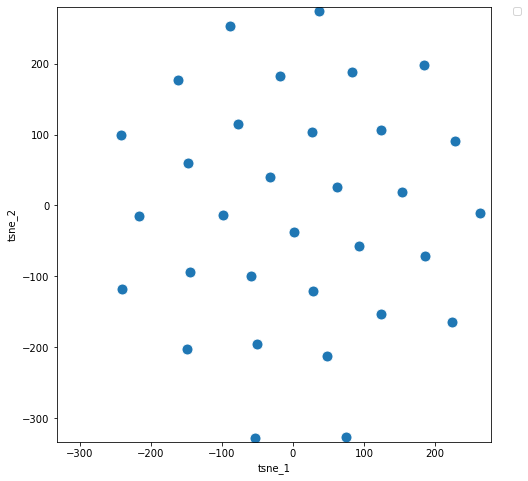

In [84]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

**we use T-SNE with onl the avg data except the timestamp and the turbine names and label:**

In [50]:
df = pd.read_csv('data/la-haute-borne-data-2017-2020-AVG.csv', sep=';',header=1)
df_header = pd.read_csv('data/la-haute-borne-data-2017-2020-AVG.csv', sep=';',header=None)
df1 = df.sample(32)
df2 = df1.values
pd_header = df_header.values
label = pd_header[0]
df1.head()

C:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,44.990002,14.0,38.369999,2.3900001,-1.8900000000000001,0.0,1.8900000000000001,1.0,38.110001,33.41,...,39.939999,4.8000001999999995,50.0,698.40002,0.33000001,19.02,-18.889999,Unnamed: 31,358.04999.1,358.04999.2
115367,-0.99,15.00,1198.30,1696.56990,179.630000,14.130000,180.230000,1.00,1195.0601,39.380001,...,-6.99,6.80,50.020000,701.97998,11.38,25.01,1434.15000,NaN,233.63,233.63
21474,-0.57,23.01,1036.15,896.22998,73.860001,22.120001,84.529999,0.99,1038.7300,46.830002,...,13.41,21.02,49.990002,699.94000,9.88,31.15,637.21997,NaN,NaN,NaN
51138,-0.99,29.00,1097.84,1305.07000,123.220000,35.040000,128.240000,0.96,1103.9700,38.850000,...,NaN,19.85,50.010000,698.05000,10.51,31.60,1061.58000,NaN,NaN,NaN
2614,-1.00,14.00,1213.96,1733.84000,195.259990,18.320000,196.160000,0.99,1220.6200,35.340000,...,2.26,6.75,49.959999,701.23999,11.62,20.32,1522.89000,NaN,NaN,NaN
75529,-0.99,16.00,1269.70,1915.52000,225.690000,32.440000,228.210000,0.99,1266.1400,38.530000,...,NaN,7.13,49.980000,702.58000,12.06,30.06,1684.48000,NaN,NaN,NaN


In [51]:
label = np.delete(label, [0,1])
label.shape
df_rdy = np.delete(df2, [0,1], axis=1)
df_rdy.shape
df_rdy[pd.isnull(df_rdy)] = 0

In [52]:
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df_rdy)
tsne_result.shape
# (136, 2)
label.shape

(32,)

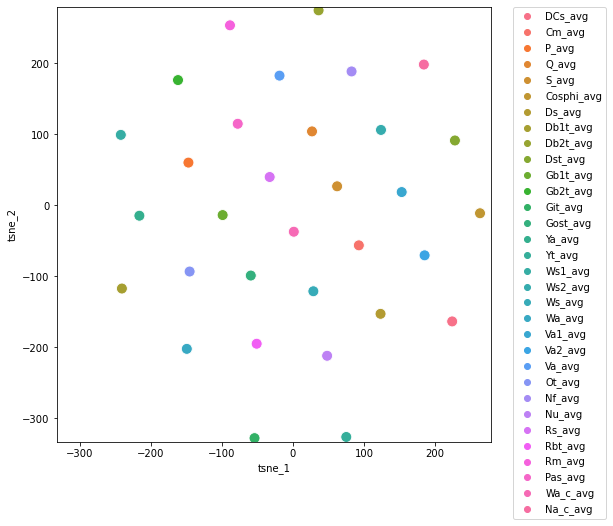

In [53]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': label})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [62]:
from openTSNE import TSNE, TSNEEmbedding, affinity, initialization

In [76]:
tsne = TSNE(
    perplexity=10,
    metric="euclidean",
    #metric="cosine",
    initialization="random",
    n_jobs=8,
    random_state=42,
)

embedding = tsne.fit(df_rdy)

embedding.shape


(32, 2)

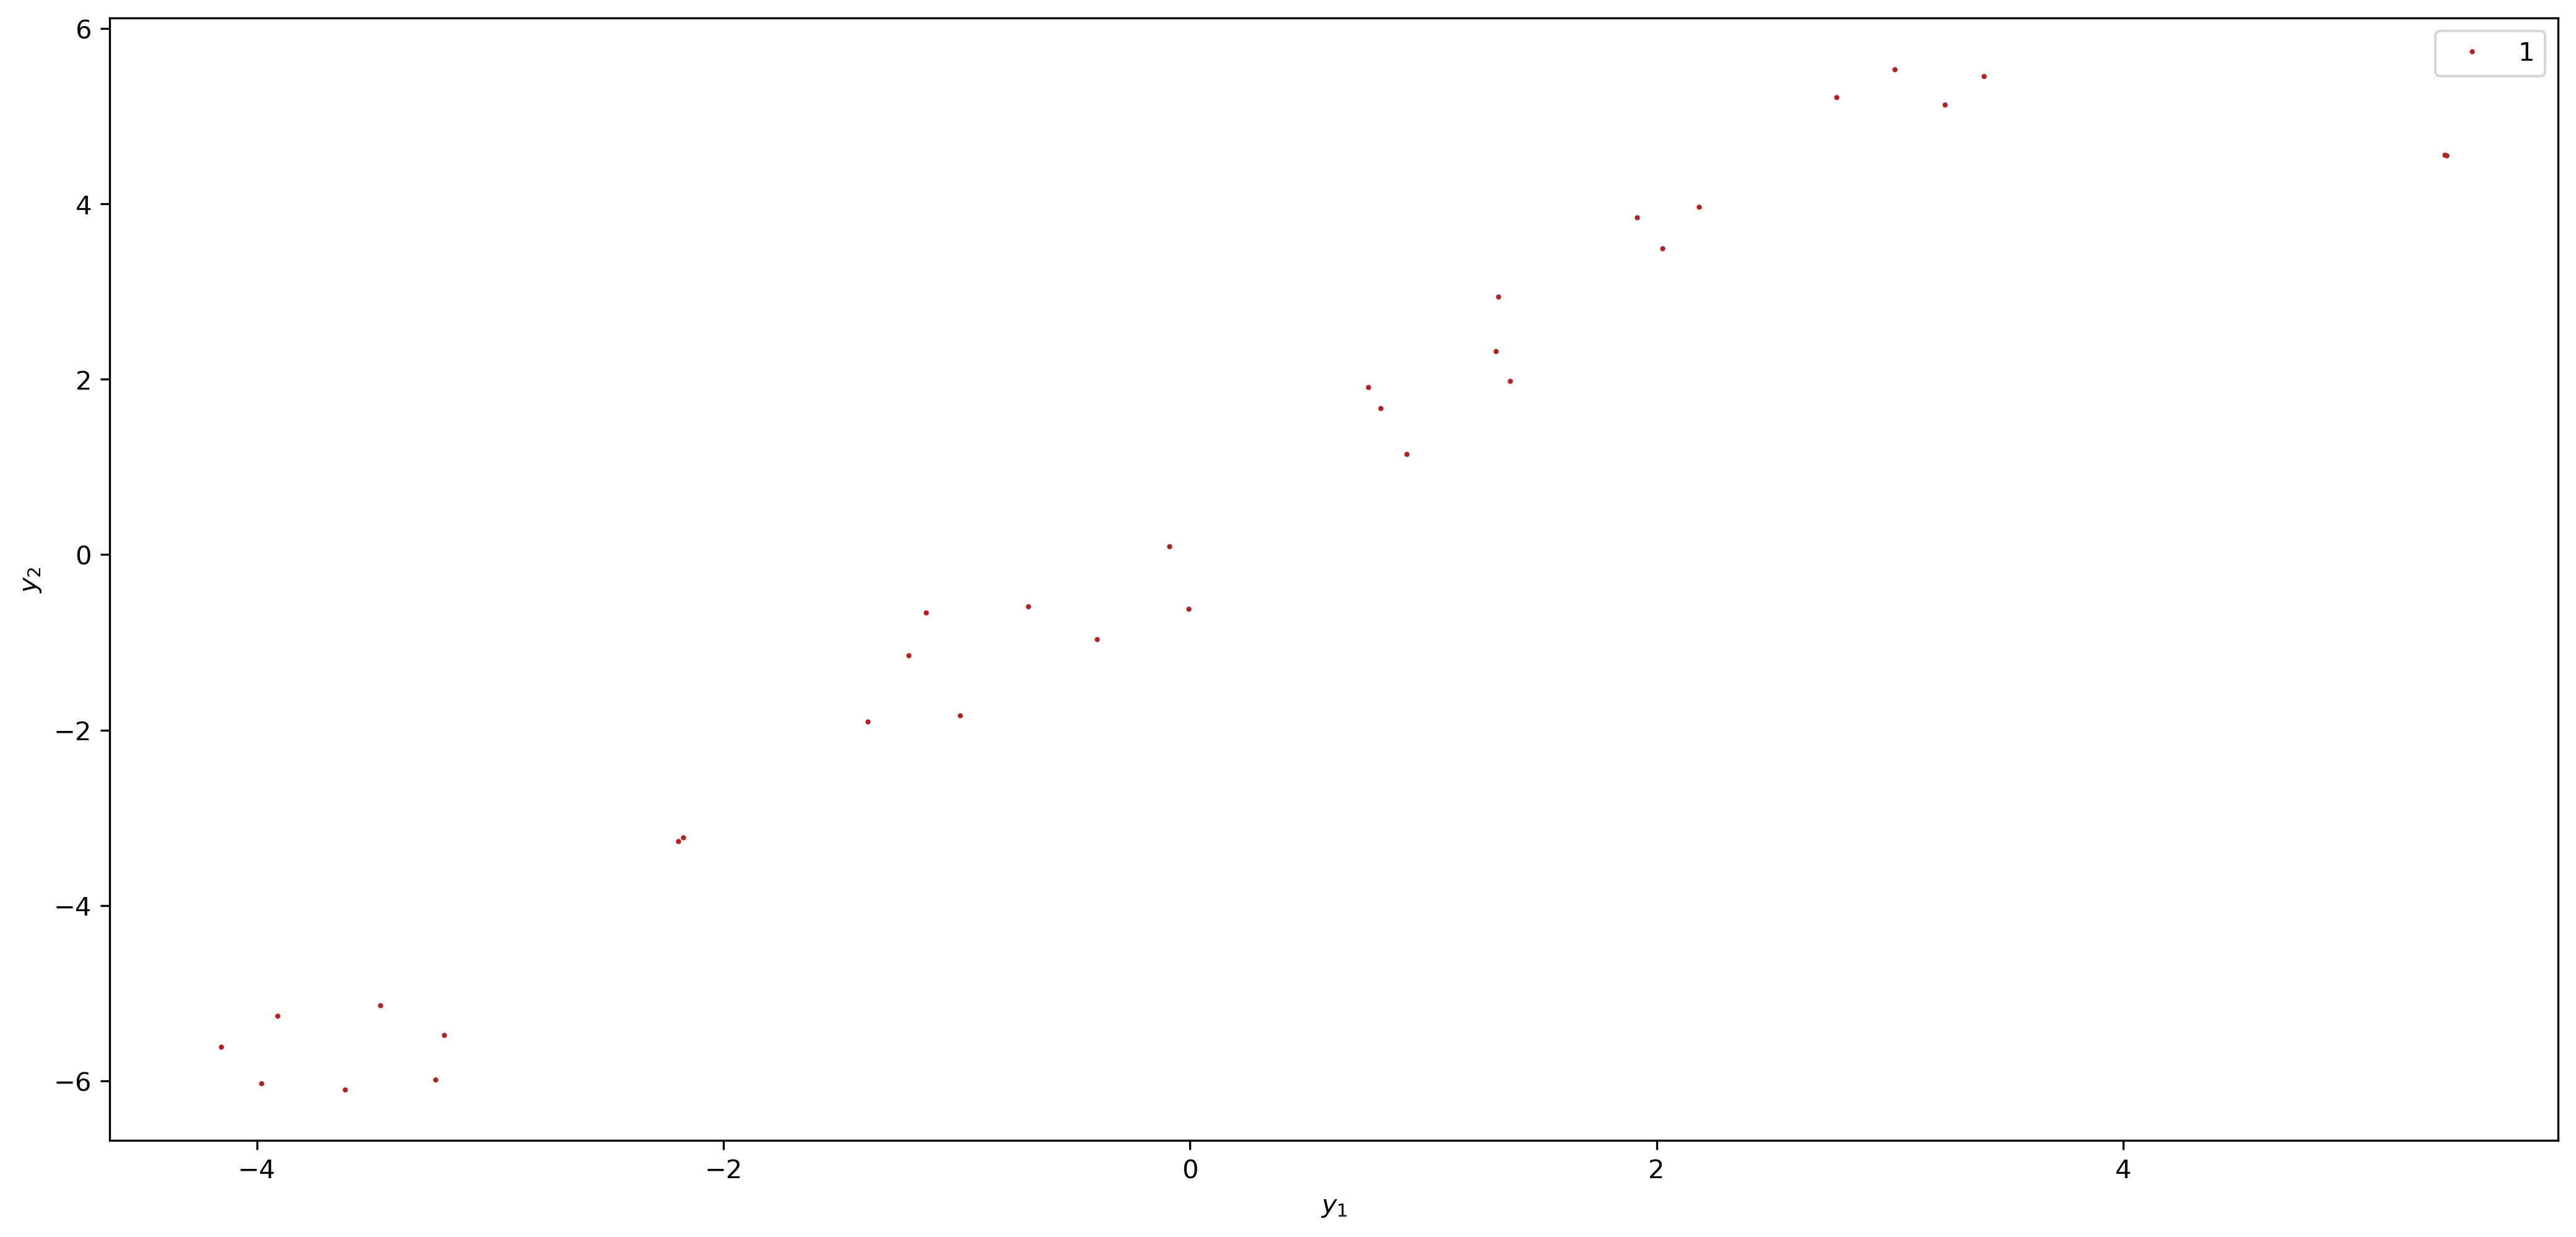

In [80]:
with plt.rc_context():
    fig, ax = plt.subplots(1, 1, dpi=300)
    ax.plot(
        embedding[:,0],
        embedding[:,1],
        ".",
        color="firebrick",
        #     mfc="none",
        label="1",
        ms=2,
    )
    
    ax.set_xlabel("$y_1$")
    ax.set_ylabel("$y_2$")
    ax.legend()